In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf



In [18]:
data = pd.read_csv('/content/Android_Malware.csv')
data = data.sample(n=30000)
data.head()

<ipython-input-18-543a9e897de1>:1: DtypeWarning: Columns (56,58,63) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/Android_Malware.csv')


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
336725,441,180.149.136.194-10.42.0.211-80-44276-6,10.42.0.211,44276,180.149.136.194,80.0,6.0,16/06/2017 08:15:26,716111,3,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
79642,2395,10.42.0.151-104.192.110.245-57368-443-6,104.192.110.245,443,10.42.0.151,57368.0,6.0,14/06/2017 01:40:01,5034,1,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
326011,1765,10.42.0.211-10.42.0.1-60784-53-17,10.42.0.211,60784,10.42.0.1,53.0,17.0,30/06/2017 10:21:33,78085,1,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_SMS_Malware
174789,2789,10.42.0.151-10.42.0.1-14329-53-17,10.42.0.151,14329,10.42.0.1,53.0,17.0,23/06/2017 11:00:20,31373,1,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware
183066,2529,10.42.0.151-10.42.0.1-38005-53-17,10.42.0.151,38005,10.42.0.1,53.0,17.0,23/06/2017 02:15:03,95821,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware


In [19]:
data.dtypes

,0
Unnamed: 0,int64
Flow ID,object
Source IP,object
Source Port,int64
Destination IP,object
...,...
Idle Mean,float64
Idle Std,float64
Idle Max,float64
Idle Min,float64


In [20]:
data = data.drop(columns=['Unnamed: 0'])

In [21]:
data

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
336725,180.149.136.194-10.42.0.211-80-44276-6,10.42.0.211,44276,180.149.136.194,80.0,6.0,16/06/2017 08:15:26,716111,3,3,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
79642,10.42.0.151-104.192.110.245-57368-443-6,104.192.110.245,443,10.42.0.151,57368.0,6.0,14/06/2017 01:40:01,5034,1,1,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
326011,10.42.0.211-10.42.0.1-60784-53-17,10.42.0.211,60784,10.42.0.1,53.0,17.0,30/06/2017 10:21:33,78085,1,1,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_SMS_Malware
174789,10.42.0.151-10.42.0.1-14329-53-17,10.42.0.151,14329,10.42.0.1,53.0,17.0,23/06/2017 11:00:20,31373,1,1,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware
183066,10.42.0.151-10.42.0.1-38005-53-17,10.42.0.151,38005,10.42.0.1,53.0,17.0,23/06/2017 02:15:03,95821,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318478,10.42.0.1-10.42.0.42-53-3474-17,10.42.0.42,3474,10.42.0.1,53.0,17.0,14/08/2017 11:09:38,24023,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_SMS_Malware
348293,175.100.207.231-10.42.0.151-443-42278-6,10.42.0.151,42278,175.100.207.231,443.0,6.0,16/06/2017 09:04:25,20660458,54,51,...,20.0,7103957.0,0.0,7103957.0,7103957.0,7175489.0,0.0,7175489.0,7175489.0,Benign
79132,183.56.172.95-10.42.0.151-80-57105-6,183.56.172.95,80,10.42.0.151,57105.0,6.0,14/06/2017 01:40:02,827017,2,1,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
175561,10.42.0.151-106.39.169.66-48447-443-6,106.39.169.66,443,10.42.0.151,48447.0,6.0,23/06/2017 10:35:37,78849,2,1,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
      if data[col].apply(type).nunique() > 1:
          data[col] = data[col].astype(str)
    data[col] = le.fit_transform(data[col])
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for y_el in y_train:
  print(le.inverse_transform([y_el]))

Streaming output truncated to the last 5000 lines.
['Android_SMS_Malware']
['Android_Adware']
['Benign']
['Android_Adware']
['Android_Adware']
['Android_Scareware']
['Android_Adware']
['Android_SMS_Malware']
['Benign']
['Android_Adware']
['Android_SMS_Malware']
['Android_Adware']
['Android_Scareware']
['Android_SMS_Malware']
['Android_SMS_Malware']
['Android_Scareware']
['Android_SMS_Malware']
['Android_Adware']
['Android_Scareware']
['Android_Adware']
['Android_Scareware']
['Android_Scareware']
['Benign']
['Android_Adware']
['Android_Adware']
['Android_Scareware']
['Android_Scareware']
['Android_Scareware']
['Android_Scareware']
['Android_Scareware']
['Android_Adware']
['Benign']
['Android_Scareware']
['Android_Adware']
['Android_SMS_Malware']
['Android_Scareware']
['Android_Adware']
['Benign']
['Android_Scareware']
['Benign']
['Android_Adware']
['Android_SMS_Malware']
['Android_Scareware']
['Android_Adware']
['Android_Adware']
['Android_SMS_Malware']
['Android_Adware']
['Android_Adwa

In [23]:
X_train
 # Verifying that data is shuffled


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
328030,15036,3,15799,2058,6,1,18534,13,0,1,...,0,4,0,0,0,0,0,0,0,0
237658,23913,3,3711,1037,6,1,16888,8681,8,8,...,3,7,0,0,0,0,0,0,0,0
252272,869,2,2290,5,1,2,19699,11892,0,1,...,0,7,0,0,0,0,0,0,0,0
217042,26121,3,11170,1137,3,1,15756,23910,29,70,...,4,7,0,0,0,0,0,0,0,0
97404,745,2,2036,5,1,2,8591,493,0,1,...,0,4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131747,14681,3,14145,2007,3,1,9502,18987,2,1,...,0,4,0,0,0,0,0,0,0,0
167153,17225,2,8544,455,6,2,11857,4443,0,1,...,0,7,0,0,0,0,0,0,0,0
251493,24193,2,17306,1047,3,1,19736,10976,1,0,...,0,7,0,0,0,0,0,0,0,0
333976,14336,3,3695,1905,6,1,9915,10,0,1,...,0,7,0,0,0,0,0,0,0,0


['Android_SMS_Malware' 'Android_Scareware' 'Android_Scareware' ...
 'Android_Scareware' 'Benign' 'Android_Scareware']


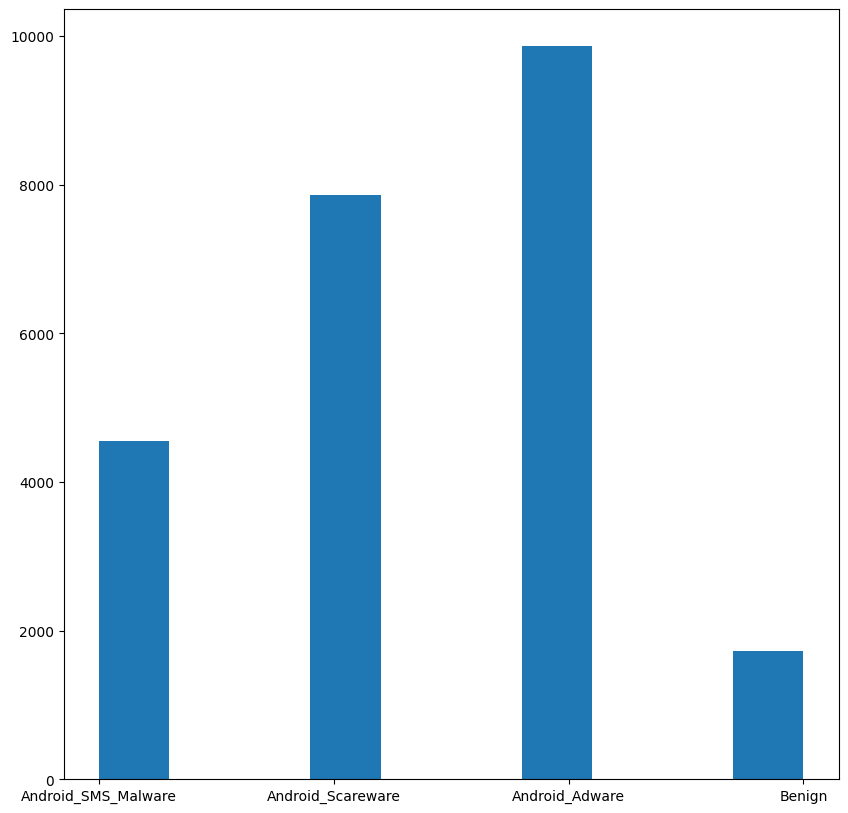

In [24]:
plt.figure(figsize=(10,10))
print(le.inverse_transform(y_train))
plt.hist(le.inverse_transform(y_train))
plt.show()

In [25]:
X_train

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
328030,15036,3,15799,2058,6,1,18534,13,0,1,...,0,4,0,0,0,0,0,0,0,0
237658,23913,3,3711,1037,6,1,16888,8681,8,8,...,3,7,0,0,0,0,0,0,0,0
252272,869,2,2290,5,1,2,19699,11892,0,1,...,0,7,0,0,0,0,0,0,0,0
217042,26121,3,11170,1137,3,1,15756,23910,29,70,...,4,7,0,0,0,0,0,0,0,0
97404,745,2,2036,5,1,2,8591,493,0,1,...,0,4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131747,14681,3,14145,2007,3,1,9502,18987,2,1,...,0,4,0,0,0,0,0,0,0,0
167153,17225,2,8544,455,6,2,11857,4443,0,1,...,0,7,0,0,0,0,0,0,0,0
251493,24193,2,17306,1047,3,1,19736,10976,1,0,...,0,7,0,0,0,0,0,0,0,0
333976,14336,3,3695,1905,6,1,9915,10,0,1,...,0,7,0,0,0,0,0,0,0,0


In [ ]:

tf.random.set_seed(42)

multi_classification_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

multi_classification_model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                                     optimizer=tf.keras.optimizers.Adam(),
                                     metrics=['accuracy'])

non_normalized_history = multi_classification_model_1.fit(X_train, y_train, epochs=40,validation_data=(X_test, y_test))



Epoch 1/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3540 - loss: 350.6175 - val_accuracy: 0.4162 - val_loss: 1.4299
Epoch 2/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3979 - loss: 1.6559 - val_accuracy: 0.4178 - val_loss: 1.2697
Epoch 3/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3989 - loss: 1.3514 - val_accuracy: 0.4172 - val_loss: 1.2535
Epoch 4/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4026 - loss: 1.2639 - val_accuracy: 0.4175 - val_loss: 1.3057
Epoch 5/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4018 - loss: 1.2788 - val_accuracy: 0.4172 - val_loss: 1.2254
Epoch 6/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4042 - loss: 1.2650 - val_accuracy: 0.4178 - val_loss: 1.2232
Epoch 7/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4042 - loss: 1.2411 - val_accuracy: 0.4178 - val_loss: 1.2235
Epoch 8/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4039 - loss: 1.2412 - val_accuracy: 

# Improving Model


In [14]:
X_train_normalized = X_train /   X_train.max()
X_test_normalized = X_test /  X_test.max()


# Check min and max of scaled data
X_train_normalized.min(), X_train_normalized.max()

(Flow ID              5.864249e-10
  Source IP           0.000000e+00
  Source Port         0.000000e+00
  Destination IP      1.172850e-09
  Destination Port    0.000000e+00
                          ...     
  Active Min          0.000000e+00
 Idle Mean            0.000000e+00
  Idle Std            0.000000e+00
  Idle Max            0.000000e+00
  Idle Min            0.000000e+00
 Length: 84, dtype: float64,
 Flow ID              1.617536e-05
  Source IP           5.547579e-07
  Source Port         1.073568e-05
  Destination IP      1.333530e-06
  Destination Port    1.692422e-06
                          ...     
  Active Min          1.892393e-06
 Idle Mean            2.019647e-06
  Idle Std            4.638621e-07
  Idle Max            2.019647e-06
  Idle Min            2.019647e-06
 Length: 84, dtype: float64)

In [15]:
tf.random.set_seed(42)

normalized_history = multi_classification_model_1.fit(X_train_normalized, y_train, epochs=40,validation_data=(X_test_normalized, y_test))

Epoch 1/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4183 - loss: 1.2331 - val_accuracy: 0.4105 - val_loss: 1.2186
Epoch 2/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4183 - loss: 1.2330 - val_accuracy: 0.4105 - val_loss: 1.2186
Epoch 3/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4183 - loss: 1.2330 - val_accuracy: 0.4105 - val_loss: 1.2186
Epoch 4/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4183 - loss: 1.2330 - val_accuracy: 0.4105 - val_loss: 1.2186
Epoch 5/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4183 - loss: 1.2330 - val_accuracy: 0.4105 - val_loss: 1.2186
Epoch 6/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4183 - loss: 1.2330 - val_accuracy: 0.4105 - val_loss: 1.2186
Epoch 7/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4183 - loss: 1.2330 - val_accuracy: 0.4105 - val_loss: 1.2186
Epoch 8/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4183 - loss: 1.2330 - val_accuracy: 0.